# **Introduction**


This project focused on data wrangling from the WeRateDogs Twitter account using Python, documented in a Jupyter Notebook (wrangle_act.ipynb). WeRateDogs is a Twitter account that rates people's dog with humorous comment about the dog. The rating denominator is usually 10, however, the numerators are usually greater than 10 (max 15). WeRateDogs has over 4 million followers and has received international media coverage.

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. Twitter archive is great, but it only contains basic tweet, not everything. Additional data from Twitter API is imported  that comes in JSON format for further investigation.

**Gathering Data**

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import tweepy
import time


In [2]:
#Load twitter-archive data
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
#download tweet image prediction file programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open ('image_prediction.tsv','wb') as file:
    file.write(response.content)


In [17]:
#load image prediction file
img_prediction = pd.read_csv('image_prediction.tsv',sep='\t')
img_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [11]:
#Query Twitter Data 

consumer_key = 'i4nJ7ooKMUOlM4rzLR0TFDl4x'
consumer_secret = 'geVoijW1Hc3EdJILXBM3TGI47WeNvSoj2KXwxeKTNn8tJTVYvy'
access_token = '1348625443507691522-T80ccR9VvI3Z3xGzN2nULYV2rodY3M'
access_secret = 'pGumbQ7V4NPPmNRXelVRcsiTQurgf8Z1T8YtkL2sfe9Nq'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit_notify = True)
print('ok')

ok


In [12]:
tweet_ids = list(twitter['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 307


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 353


In [13]:
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [14]:
tweet_json = pd.read_json('tweet_json.txt')
tweet_json['tweet_id'] = tweet_id_success
tweet_json = tweet_json[['tweet_id', 'favorite_count', 'retweet_count']]

tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35050,7373
1,892177421306343426,30365,5494
2,891815181378084864,22823,3632
3,891689557279858688,38347,7551
4,891327558926688256,36622,8139


These data has now been loaded into the following dataframes:

- twitter: (twitter-archive-enhanced.csv)
contains basic tweet data about 2356 of their tweets 
- img_prediction: (image_prediction.tsv)
contains the prediction result throuh neural network that classify breeds of dogs.The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
- tweet_json: Additional data about the WeRateDogs tweets gathered via Twitter API.

# Assessing Data

In [15]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1558,688789766343622656,NaN,NaN,2016-01-17 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688789766...,8,10,Pubert,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
585,800018252395122689,NaN,NaN,2016-11-19 16:49:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo doin a struggle. 11/10 much det...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800018252...,11,10,None,doggo,None,None,None
1138,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728035342...,12,10,all,None,None,pupper,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [33]:
twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [34]:
twitter['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [75]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
img_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
32,666428276349472768,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,1,Pembroke,0.371361,True,chow,0.249394,True,Pomeranian,0.241878,True
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True,Scotch_terrier,0.064369,True,Old_English_sheepdog,0.043763,True
968,706346369204748288,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1,Tibetan_mastiff,0.956462,True,Rottweiler,0.025381,True,Appenzeller,0.008679,True
1162,734912297295085568,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
582,678798276842360832,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,1,Airedale,0.583122,True,silky_terrier,0.129567,True,Lakeland_terrier,0.094727,True
414,674008982932058114,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg,1,jigsaw_puzzle,0.970810,False,prayer_rug,0.011048,False,quill,0.008432,False
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True


In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   favorite_count  2330 non-null   int64
 2   retweet_count   2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [13]:
tweet_json.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35050,7374
1,892177421306343426,30352,5494


Quality issues summary
- HTML entities found in source,  require to extract important text to enhance readability.
- Convert 'source' datatype to categorical 
- Timestamp need to be converted to datetime format
- Incorrect denominators , 
- Some rating numerators are too large 
- The key points indicates that we’re only interested in “original tweets”, no “retweets”.181 datas are stored in the columns retweeted_status_id, retweeted_status_timestamp.retweeted_status_user_id, retweeted_status_timestamp.
- Nulls represented as 'None' in columns 'name'. 
- Uncapitalized texts are incorrect in 'name' column Example "a", "an", "the" etc
- Image prediction contains data redundancy 

Tidy Issues
- twitter-archive-enhanced.csv's doggo, floofer, pupper, and puppo columns should be merged into one column
- All three files have common tweet_id column, which can be used to join all three files as one dataframe.
- Dropping retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id columns.

# Cleaning Data

In [18]:
twitter1 = twitter.copy()
img_prediction1 = img_prediction.copy()
tweet_json1 = tweet_json.copy()

# Quality Issue 1

**Define**

HTML entities found in source, extract important text to enhance readability.

**Code**

In [19]:
twitter1['source'] = twitter1['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

**Test**

In [20]:
twitter1['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

# Quality Issue 2

**Define**

'Source' datatype should be converted to Category instead of String 

**Code**

In [21]:
twitter1['source'] = twitter1['source'].astype('category')

**Test**

In [106]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   category
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  doggo             

# Quality Issue 3

**Define**

Striping +0000 from timestamp and convert its datatype to 'datetime'

**Code**

In [22]:
twitter1['timestamp'] = twitter1['timestamp'].str[:-5].str.strip()

In [23]:
twitter1['timestamp'] = pd.to_datetime(twitter1.timestamp)

**Test**

In [24]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   category      
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [25]:
twitter1['timestamp'].sample(2)

105   2017-06-06 16:07:15
932   2016-07-15 17:56:40
Name: timestamp, dtype: datetime64[ns]

# Quality Issue 4


**Define**

Incorrect denominator, denominator should be 10. 


**Code**

In [26]:
twitter1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
twitter1.loc[twitter1['rating_denominator'] != 10, 'rating_denominator'] = 10

**Test**

In [113]:
twitter1.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

# Quality Issue 5

**Define**

According to WeRateDog, 15 is the highest rating. There are several rating numerator higher than 15.This section, I'm going to remove rating numerator > 15 


**Code**

In [28]:
twitter1.loc[twitter1['rating_numerator']>15,['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
55,881633300179243008,17,10
188,855862651834028034,420,10
189,855860136149123072,666,10
290,838150277551247360,182,10
313,835246439529840640,960,10
340,832215909146226688,75,10
433,820690176645140481,84,10
516,810984652412424192,24,10
695,786709082849828864,75,10
763,778027034220126208,27,10


In [29]:
twitter1 = twitter1[twitter1['rating_numerator'] < 15]

**Test**

In [30]:
twitter1.loc[twitter1['rating_numerator']>15,['tweet_id','rating_numerator','rating_denominator']]


,tweet_id,rating_numerator,rating_denominator


# Quality Issue 6

**Define**
The key points indicates that we’re only interested in “original tweets”, no “retweets”.181 datas are stored in the columns retweeted_status_id, retweeted_status_timestamp.retweeted_status_user_id, retweeted_status_timestamp.

**Code**

In [30]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2328 non-null   int64         
 1   in_reply_to_status_id       70 non-null     float64       
 2   in_reply_to_user_id         70 non-null     float64       
 3   timestamp                   2328 non-null   datetime64[ns]
 4   source                      2328 non-null   category      
 5   text                        2328 non-null   object        
 6   retweeted_status_id         179 non-null    float64       
 7   retweeted_status_user_id    179 non-null    float64       
 8   retweeted_status_timestamp  179 non-null    object        
 9   expanded_urls               2276 non-null   object        
 10  rating_numerator            2328 non-null   int64         
 11  rating_denominator          2328 non-null   int64       

In [31]:
twitter1= twitter1[twitter1.retweeted_status_id.isna()]
twitter1 = twitter1[twitter1.in_reply_to_status_id.isna()]

**Test**

In [32]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2079 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2079 non-null   datetime64[ns]
 4   source                      2079 non-null   category      
 5   text                        2079 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2076 non-null   object        
 10  rating_numerator            2079 non-null   int64         
 11  rating_denominator          2079 non-null   int64       

# Quality Issue 7

**Define**

'name' column contains 'None' string instead of 'NaN', replacing None with NaN

**Code**

In [33]:
twitter.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Jomathan       1
Banditt        1
Bonaparte      1
Kane           1
Angel          1
Name: name, Length: 957, dtype: int64

In [34]:
twitter1['name']=twitter1['name'].replace('None',np.nan)

**Test**

In [35]:
twitter1['name'].value_counts()

a          54
Lucy       11
Charlie    11
Oliver     10
Cooper     10
           ..
Howie       1
Gòrdón      1
Trip        1
Happy       1
Lillie      1
Name: name, Length: 951, dtype: int64

# Quality Issue 8

**Define**

Uncapitalized texts are incorrect in 'name' column/ Example "a", "an", "the" etc

**Code**

In [36]:
twitter1.loc[twitter['name'].str.islower(),'name']='None'

**Test**

In [37]:
twitter1['name'].value_counts()

None       102
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Burt         1
Champ        1
Howie        1
Gòrdón       1
Pipsy        1
Name: name, Length: 928, dtype: int64

# **Quality Issue 9**

**Define**

Image prediction contains data redundancy. This section i will be  

**Code**

In [38]:
imgp1 = img_prediction1.query('p1_dog==True')[['tweet_id', 'p1', 'p1_conf']]
imgp2 = img_prediction1.query('p1_dog==False & p2_dog ==True')[['tweet_id', 'p2', 'p2_conf']]
imgp3 = img_prediction1.query('p1_dog==False & p2_dog ==False & p3_dog ==True')[['tweet_id', 'p3', 'p3_conf']]

In [39]:
imgp1.columns = ['tweet_id','predictions', 'confidence']
imgp2.columns = ['tweet_id','predictions', 'confidence']
imgp3.columns = ['tweet_id','predictions', 'confidence']

img_prediction_new = pd.concat([imgp1, imgp2, imgp3])


**Test**

In [40]:
img_prediction_new

,tweet_id,predictions,confidence
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,German_shepherd,0.596461
3,666044226329800704,Rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311
...,...,...,...
1872,844979544864018432,Shetland_sheepdog,0.000132
1899,851224888060895234,standard_poodle,0.005683
1942,861288531465048066,Bouvier_des_Flandres,0.082610
1944,861769973181624320,cocker_spaniel,0.046403


# Tidiness 1

**Define**

Merging 3 datasets into one single dataset

**Code**

In [41]:
# Merge all three dfs on tweet_id 
twitter2 = pd.merge(twitter1, img_prediction_new,on='tweet_id', how='inner')
twitter2 = pd.merge(twitter2, tweet_json1,on='tweet_id', how='inner')

**Test**

In [42]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 0 to 1643
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1644 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1644 non-null   datetime64[ns]
 4   source                      1644 non-null   category      
 5   text                        1644 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1644 non-null   object        
 10  rating_numerator            1644 non-null   int64         
 11  rating_denominator          1644 non-null   int64       

In [43]:
twitter2.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,predictions,confidence,favorite_count,retweet_count
291,819004803107983360,NaN,NaN,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,...,10,Bo,doggo,None,None,None,standard_poodle,0.351308,85561,36126
1515,668960084974809088,NaN,NaN,2015-11-24 01:11:27,Twitter for iPhone,Meet Jaycob. He got scared of the vacuum. Hide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668960084...,...,10,Jaycob,None,None,None,None,Chesapeake_Bay_retriever,0.165878,655,224
1286,675354435921575936,NaN,NaN,2015-12-11 16:40:19,Twitter Web Client,Everyone needs to watch this. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435...,...,10,NaN,None,None,None,None,golden_retriever,0.181351,30590,15632


# Tidiness 2

**Define**

Replace None with Nan in doggo, floofer, pupper and puppo columns and combined into 1 column

**Code**


In [44]:
twitter2['doggo'].value_counts()

None     1581
doggo      62
Name: doggo, dtype: int64

In [46]:
twitter2['doggo'].replace('None', '', inplace = True)
twitter2['floofer'].replace('None', '', inplace = True)
twitter2['pupper'].replace('None', '', inplace = True)
twitter2['puppo'].replace('None', '', inplace = True)

twitter2['dogo_stage'] = twitter2['doggo'] + twitter2['floofer'] + twitter2['pupper'] + twitter2['puppo']

twitter2['dogo_stage'].value_counts()

                1389
pupper           165
doggo             53
puppo             21
doggopupper        7
floofer            7
doggofloofer       1
doggopuppo         1
Name: dogo_stage, dtype: int64

In [48]:
twitter2.loc[twitter2['dogo_stage']=='doggopupper','dogo_stage']='Doggo, Pupper'
twitter2.loc[twitter2['dogo_stage']=='doggofloofer','dogo_stage']='Doggo, Flooder'
twitter2.loc[twitter2['dogo_stage']=='doggopuppo','dogo_stage']='Doggo, Puppo'

In [50]:
twitter2['dogo_stage'].replace('','Unknown', inplace=True)
twitter2['dogo_stage'].value_counts()

Unknown           1389
pupper             165
doggo               53
puppo               21
floofer              7
Doggo, Pupper        7
Doggo, Puppo         1
Doggo, Flooder       1
Name: dogo_stage, dtype: int64

In [51]:
twitter2['dogo_stage'] = twitter2['dogo_stage'].astype('category')

**Test**

In [53]:
twitter2['dogo_stage'].value_counts()

Unknown           1389
pupper             165
doggo               53
puppo               21
floofer              7
Doggo, Pupper        7
Doggo, Puppo         1
Doggo, Flooder       1
Name: dogo_stage, dtype: int64

# Tidiness 3

**Define**

Dropping unnecessary columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id , doggo , floofer, pupper, puppo

In [54]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 0 to 1643
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1644 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1644 non-null   datetime64[ns]
 4   source                      1644 non-null   category      
 5   text                        1644 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1644 non-null   object        
 10  rating_numerator            1644 non-null   int64         
 11  rating_denominator          1644 non-null   int64       

**Code**

In [55]:
twitter2 = twitter2.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp',
                                    'in_reply_to_status_id',
                                   'in_reply_to_user_id','doggo','floofer',
                         'pupper','puppo'], axis = 1)

**Test**

In [56]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 0 to 1643
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1644 non-null   int64         
 1   timestamp           1644 non-null   datetime64[ns]
 2   source              1644 non-null   category      
 3   text                1644 non-null   object        
 4   expanded_urls       1644 non-null   object        
 5   rating_numerator    1644 non-null   int64         
 6   rating_denominator  1644 non-null   int64         
 7   name                1254 non-null   object        
 8   predictions         1644 non-null   object        
 9   confidence          1644 non-null   float64       
 10  favorite_count      1644 non-null   int64         
 11  retweet_count       1644 non-null   int64         
 12  dogo_stage          1644 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), i

In [57]:
twitter2.to_csv('twitter_archive_master',index=False)


# **Analysis**

- Majority of source?
-  Is favorite count correlated with retweet count?
- Top 3 most favourite tweet  
- What is the number of tweet trend over time? 

In [61]:
df1= pd.read_csv('twitter_archive_master')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1644 non-null   int64  
 1   timestamp           1644 non-null   object 
 2   source              1644 non-null   object 
 3   text                1644 non-null   object 
 4   expanded_urls       1644 non-null   object 
 5   rating_numerator    1644 non-null   int64  
 6   rating_denominator  1644 non-null   int64  
 7   name                1254 non-null   object 
 8   predictions         1644 non-null   object 
 9   confidence          1644 non-null   float64
 10  favorite_count      1644 non-null   int64  
 11  retweet_count       1644 non-null   int64  
 12  dogo_stage          1644 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 167.1+ KB


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1644 non-null   int64         
 1   timestamp           1644 non-null   datetime64[ns]
 2   source              1644 non-null   object        
 3   text                1644 non-null   object        
 4   expanded_urls       1644 non-null   object        
 5   rating_numerator    1644 non-null   int64         
 6   rating_denominator  1644 non-null   int64         
 7   name                1254 non-null   object        
 8   predictions         1644 non-null   object        
 9   confidence          1644 non-null   float64       
 10  favorite_count      1644 non-null   int64         
 11  retweet_count       1644 non-null   int64         
 12  dogo_stage          1644 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), obje

# Insight 1: Distribution of Sources

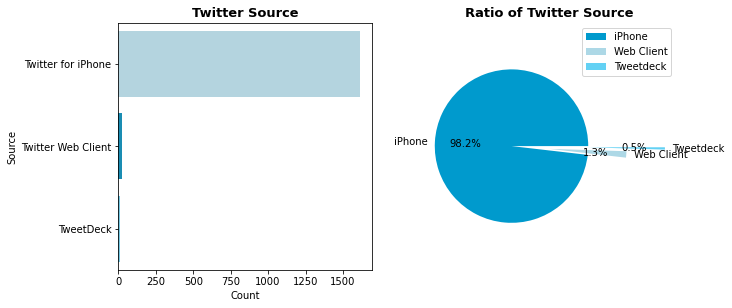

In [64]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(data=df1, y='source', palette=['#ADD8E6','#009ACD','#63D1F4'])
plt.ylabel('Source')
plt.xlabel('Count')
plt.title("Twitter Source", fontsize=13,fontweight='bold');

plt.subplot(2,2,2)
source_=df1['source'].value_counts()
plt.rcParams['font.family'] = "sans-serif"
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4']
label = ['iPhone','Web Client','Tweetdeck']
plt.pie(source_,labels=label,radius=1,autopct='%0.1f%%',shadow=False,explode=[0,0.5,1],colors=color_palette_list)
plt.axis('equal')
plt.title('Ratio of Twitter Source',fontsize=13,fontweight='bold')
plt.legend()
plt.show()


Majority source of tweets are from iPhone twitter app, which representing 98.2% in the total. That means most of user prefer using twitter mobile app as the main channel for people using to tweet, retweet, post, and others, while the  Web CLient and TweetDeck pretty rare which are 1.3 and 0.5 respectively 


# Insight 2: Is favorite count correlated with retweet count?

Text(0, 0.5, 'Favourite count')

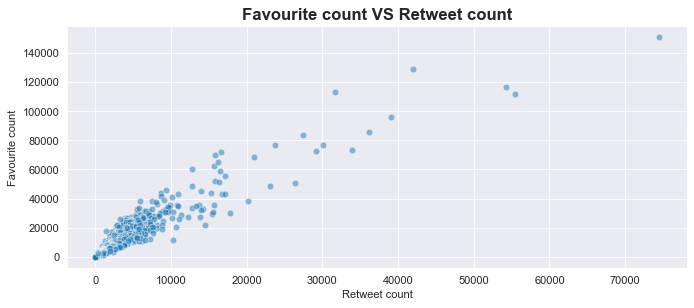

In [65]:
plt.figure(figsize=(10, 4), dpi=80)
sns.set_style('darkgrid')
sns.scatterplot(data=df1, x="retweet_count", y="favorite_count",alpha=0.5);
plt.title('Favourite count VS Retweet count',fontsize=15,fontweight='bold')
plt.xlabel('Retweet count')
plt.ylabel('Favourite count')

# Insight 3: Top 3 most favourite dog tweets


In [72]:
from IPython.display import Image
#pd.set_option('display.max_colwidth',-1)

In [73]:
df2=df1.sort_values(['favorite_count'], ascending =False ).head(3)


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 675 to 354
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            3 non-null      int64         
 1   timestamp           3 non-null      datetime64[ns]
 2   source              3 non-null      object        
 3   text                3 non-null      object        
 4   expanded_urls       3 non-null      object        
 5   rating_numerator    3 non-null      int64         
 6   rating_denominator  3 non-null      int64         
 7   name                1 non-null      object        
 8   predictions         3 non-null      object        
 9   confidence          3 non-null      float64       
 10  favorite_count      3 non-null      int64         
 11  retweet_count       3 non-null      int64         
 12  dogo_stage          3 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(5), object

In [75]:
#pd.set_option('display.max_colwidth', -1)
df2[['rating_numerator','predictions','tweet_id','expanded_urls']]

,rating_numerator,predictions,tweet_id,expanded_urls
675,13,Labrador_retriever,744234799360020481,https://twitter.com/dog_rates/status/744234799360020481/video/1
271,13,Lakeland_terrier,822872901745569793,https://twitter.com/dog_rates/status/822872901745569793/photo/1
354,13,Chihuahua,807106840509214720,https://twitter.com/dog_rates/status/807106840509214720/video/1


In [20]:
print('Top 1 most favourite tweet:',df1.loc[df1['tweet_id']==744234799360020481]['text'])
Image(url='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', width=200, height=100)

Top 1 most favourite tweet: 675    Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Name: text, dtype: object


In [76]:
print('Top 2 most favourite tweet:',df1.loc[df1['tweet_id']==822872901745569793]['text'])
Image(url='https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg', width=400, height=200)

Top 2 most favourite tweet: 271    Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
Name: text, dtype: object


In [77]:
print('3rd most favourite tweet:',df1.loc[df1['tweet_id']==807106840509214720]['text'])
Image(url='https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg', width=200, height=200)

3rd most favourite tweet: 354    This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
Name: text, dtype: object


# Insight 4: Top 10 popular dog breeds

In [78]:
df3=df1.groupby('predictions')['favorite_count'].sum()
df3=df3.sort_values(ascending=False).head(10)
df3

predictions
golden_retriever      1742408
Labrador_retriever    1075267
Pembroke              939464 
Chihuahua             694052 
French_bulldog        545614 
Samoyed               500312 
chow                  401828 
cocker_spaniel        366420 
pug                   338671 
malamute              316559 
Name: favorite_count, dtype: int64

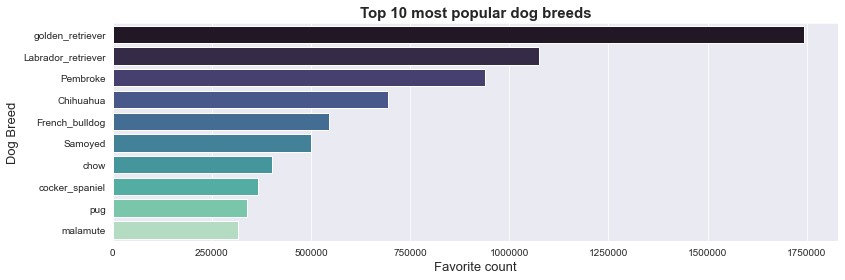

In [79]:
plt.figure(figsize=(13,4))
sns.barplot(y='predictions',x='favorite_count', data=df3.reset_index(),palette='mako');
plt.xlabel('Favorite count',fontsize=13)
plt.ylabel('Dog Breed',fontsize=13)
plt.title('Top 10 most popular dog breeds',fontsize=15,fontweight='bold')
plt.ticklabel_format(style='plain', axis='x')

# Insight 4: Number of tweets, retweet and favorite per month

In [80]:
tweetsmonth = df1.groupby([df1.timestamp.dt.year, df1.timestamp.dt.month])
tweetsmonth=tweetsmonth.agg({'tweet_id':'count', 'retweet_count': 'sum', 'favorite_count': 'sum'})
tweetsmonth=tweetsmonth.rename(columns={'tweet_id':'tweets', 'retweet_count': 'retweet_sum', 'favorite_count': 'favorite_sum'})
tweetsmonth=tweetsmonth.reset_index(drop=True)
tweetsmonth['month'] = pd.date_range('2015-11-01','2017-08-01', freq='MS').strftime("%Y-%m").tolist()


tweetsmonth

,tweets,retweet_sum,favorite_sum,month
0,225,90511,233185,2015-11
1,279,376603,934947,2015-12
2,137,165860,468836,2016-01
3,91,108503,318140,2016-02
4,102,134087,405487,2016-03
5,49,68827,212027,2016-04
6,48,87763,268884,2016-05
7,68,275799,694163,2016-06
8,76,162216,483399,2016-07
9,47,121940,398952,2016-08


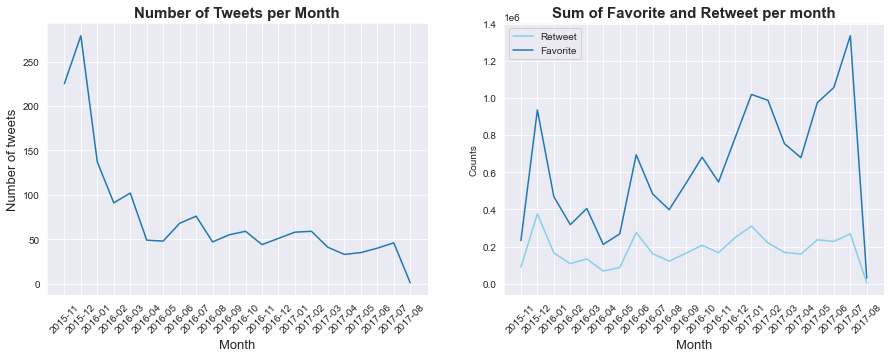

In [81]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.lineplot(data=tweetsmonth, x="month", y="tweets");
plt.title('Number of Tweets per Month', fontsize=15,fontweight='bold')
plt.xlabel('Month',fontsize=13)
plt.ylabel('Number of tweets',fontsize=13)
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.lineplot(data=tweetsmonth, x="month", y="retweet_sum",color='skyblue');
sns.lineplot(data=tweetsmonth, x="month", y="favorite_sum",palette='set1');
plt.legend(labels=['Retweet', 'Favorite'])
plt.xlabel('Month',fontsize=13)
plt.ylabel('Counts')
plt.title('Sum of Favorite and Retweet per month',fontsize=15,fontweight='bold')
plt.xticks(rotation=45);
plt.show()


